### 500 HZ 70mVpp.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [81]:
input_csv = "vidro-500Hz-70mBias1.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,630,201,0,8128
1,631,551,0,8128
2,632,551,0,8128
3,633,524,1,8128
4,631,528,1,8128


### Filter (small region just to calculate phase per pixel) and see the ROI


Number of data points: 797
            x    y  p        t
11670243  628  265  0  1100140
11670244  633  266  0  1100140
11670245  629  268  0  1100140
11670246  633  283  0  1100140
11670247  631  279  0  1100140
...       ...  ... ..      ...
11671035  633  500  0  1100190
11671036  631  488  0  1100190
11671037  632  491  0  1100190
11671038  629  494  0  1100190
11671039  633  494  0  1100190

[797 rows x 4 columns]
Time range: 1100140 to 1100190
Filtered data:
     x    y  p        t
0  628  265  0  1100140
1  633  266  0  1100140
2  629  268  0  1100140
3  633  283  0  1100140
4  631  279  0  1100140
Number of events: 797
Density array shape: (195608,)
Density indices shape: (797,)
Max density index: 154055
Min density index: 391
Densities size: 195608
Density indices (first 10): [41552 41944 42728 48608 47040 62328 61544 61936 61152 61152]


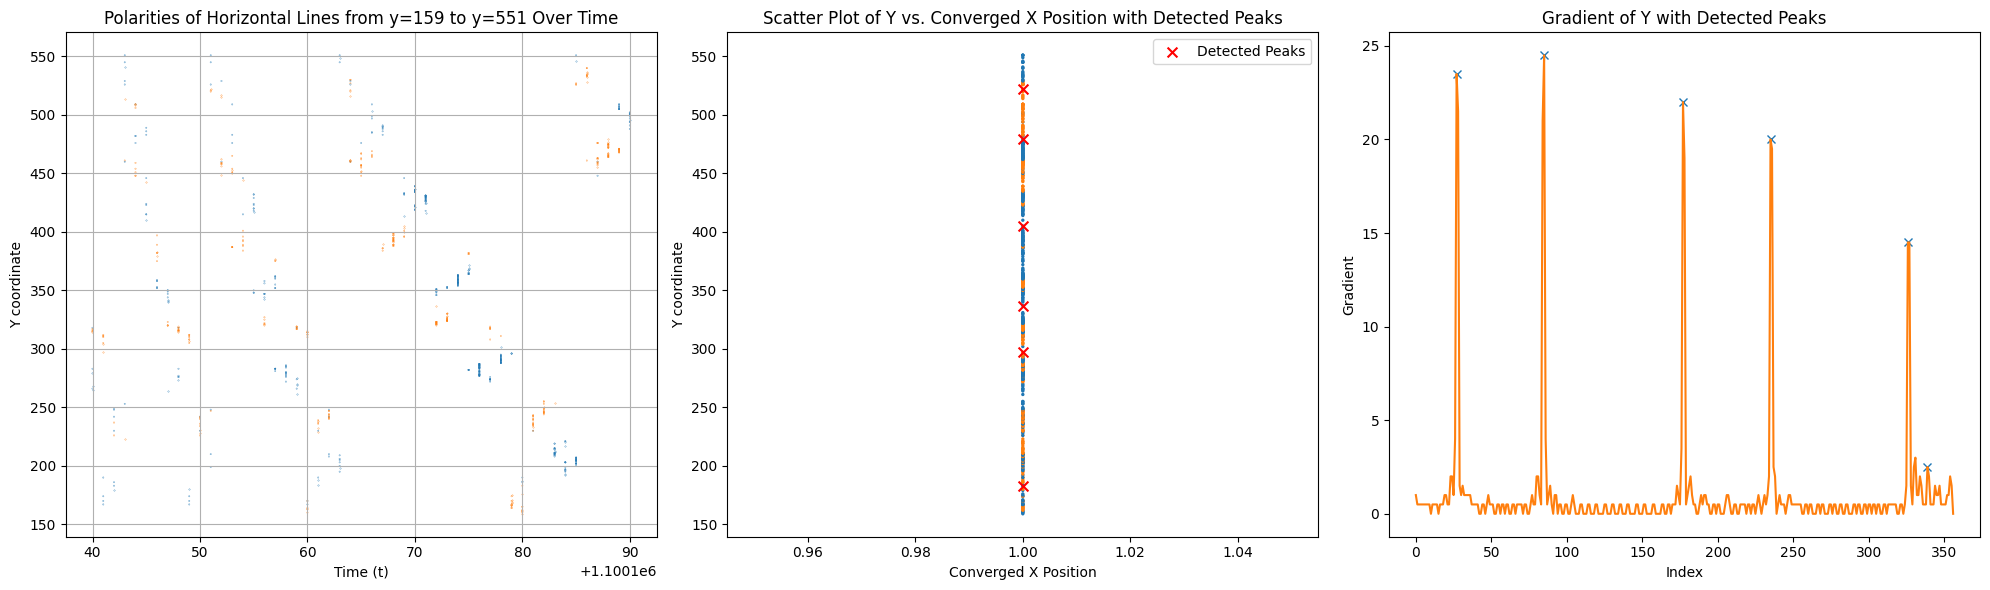

[183 297 337 405 479 522]


In [82]:
from polarityarea2 import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define the parameters
tmin = 1100140
tmax = 1100190
ymin = 159
ymax = 551
xmin = 628
xmax = 633
polarity = None

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()

# Sort the data based on y
x = line_df['x'].to_numpy()
y = line_df['y'].to_numpy()
t = line_df['t'].to_numpy()
p = line_df['p'].to_numpy()

idx = np.argsort(y)
x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

# Separate the data based on polarity
yp = y[p == 1]
yn = y[p == 0]

# Calculate the gradient of yp
gradyp = np.gradient(yp)

# Find peaks in the gradient of the y data for polarity = 1
peaksidx, _ = find_peaks(gradyp, distance=10, prominence=2)

# Create the ysplit and phisplit arrays
ysplit = yp[peaksidx]
phisplit = np.arange(0, 2 * np.pi * len(ysplit), 2 * np.pi)

# Create a subplot grid with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# First plot: Using plot_lines_polarity_over_time
plot_lines_polarity_over_time(input_csv, xmin, xmax, ymin, ymax, tmin, tmax, polarity, ax=ax1)

# Second plot: Scatter plot of y vs. position (converged x)
colors = ["C0", "C1"]
colors_vec = [colors[p] for p in line_df['p']]

# Set all x positions to the same value (e.g., 1) to align them vertically
converged_x = np.ones(len(t))
ax2.scatter(converged_x, y, s=2, c=colors_vec)

# Overlay the detected peaks on the scatter plot
ax2.scatter(converged_x[peaksidx], yp[peaksidx], s=50, c="red", marker="x", label="Detected Peaks")

# Configure labels and title for the second plot
ax2.set_xlabel('Converged X Position')
ax2.set_ylabel('Y coordinate')
ax2.set_title('Scatter Plot of Y vs. Converged X Position with Detected Peaks')
ax2.legend()

# Third plot: Gradient of y with peaks
ax3.plot(peaksidx, abs(gradyp[peaksidx]), "x")
ax3.plot(gradyp)
ax3.set_title('Gradient of Y with Detected Peaks')
ax3.set_xlabel('Index')
ax3.set_ylabel('Gradient')

plt.tight_layout()
plt.show()

print(ysplit)


In [83]:
phisplit

array([ 0.        ,  6.28318531, 12.56637061, 18.84955592, 25.13274123,
       31.41592654])

[0.         0.05511566 0.11023132 0.16534698 0.22046264 0.2755783
 0.33069396 0.38580962 0.44092528 0.49604095 0.55115661 0.60627227
 0.66138793 0.71650359 0.77161925 0.82673491 0.88185057 0.93696623
 0.99208189 1.04719755 1.10231321 1.15742887 1.21254453 1.26766019
 1.32277585 1.37789151 1.43300718 1.48812284 1.5432385  1.59835416
 1.65346982 1.70858548 1.76370114 1.8188168  1.87393246 1.92904812
 1.98416378 2.03927944 2.0943951  2.14951076 2.20462642 2.25974208
 2.31485774 2.36997341 2.42508907 2.48020473 2.53532039 2.59043605
 2.64555171 2.70066737 2.75578303 2.81089869 2.86601435 2.92113001
 2.97624567 3.03136133 3.08647699 3.14159265 3.19670831 3.25182397
 3.30693964 3.3620553  3.41717096 3.47228662 3.52740228 3.58251794
 3.6376336  3.69274926 3.74786492 3.80298058 3.85809624 3.9132119
 3.96832756 4.02344322 4.07855888 4.13367454 4.1887902  4.24390587
 4.29902153 4.35413719 4.40925285 4.46436851 4.51948417 4.57459983
 4.62971549 4.68483115 4.73994681 4.79506247 4.85017813 4.905293

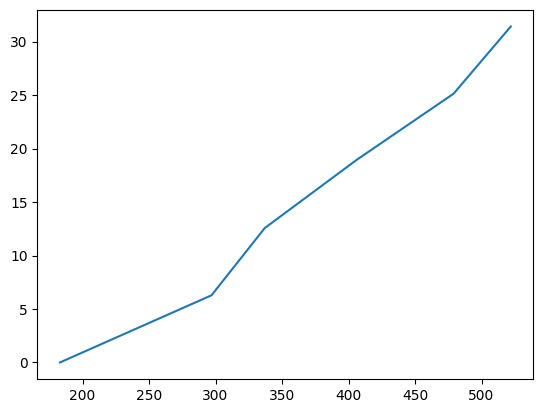

In [84]:
yroi = np.arange(ysplit[0], ysplit[-1] + 1)
phiroi = np.interp(yroi, ysplit, phisplit)
plt.plot(yroi, phiroi)
phiroi = np.mod(phiroi, 2 * np.pi) #between 0,2pi
print(phiroi)

### filter data (main data- bigger time period)

In [85]:
%matplotlib inline
# Define the parameters
tmin = 100000
tmax = 2000000
ymin = yroi[0]
ymax = yroi[-1]


# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 17522727
            x    y  p        t
982345    632  411  0   100000
982346    628  408  0   100000
982347    630  408  0   100000
982348    628  405  0   100000
982349    630  406  0   100000
...       ...  ... ..      ...
21282904  630  325  1  2000000
21282905  631  326  1  2000000
21282906  628  327  1  2000000
21282907  632  331  1  2000000
21282908  633  330  1  2000000

[17522727 rows x 4 columns]
Time range: 100000 to 2000000


### phase per pixel method application

yp: [259 263 253 ... 148 140 147]
phase: [3.14159265 3.48122429 2.6321452  ... 5.34070751 4.08407045 5.18362788]
4541860
4541860


(0.0, 5000.0)

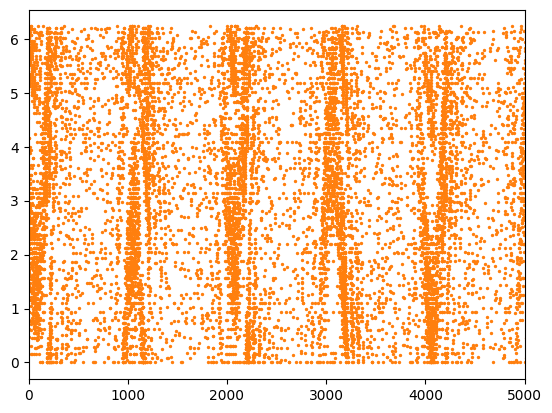

In [86]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]

tp = tp-tp[0]

yp = yp-ymin

phase = np.array([phiroi[yi] for yi in yp])

print("yp:", yp)
#print("phiroi:", phiroi[180])
print("phase:", phase)
##yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

##phase = yp*phaseperpixel
print(len(tp))
print(len(phase))
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,5000)

### Calculation of phase (centroids)

In [87]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [88]:
centroid_y,tval_vec

(array([-2.97177683,  2.79017323, -2.95679309, ..., -1.57079633,
        -1.62354217, -3.08647699]),
 array([   0,    1,    2, ..., 7926, 7927, 7929], dtype=int64))

### phases of events over time

(0.0, 2000.0)

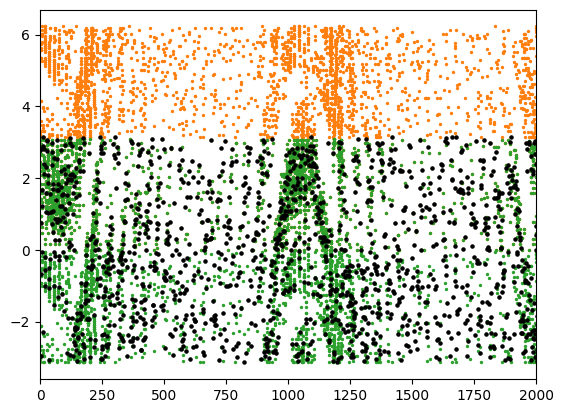

In [89]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

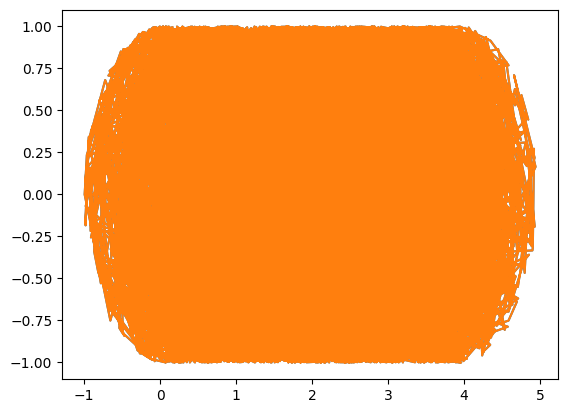

In [90]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')
plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')


### Kalman filter to smooth the phase data derived from the centroid phases

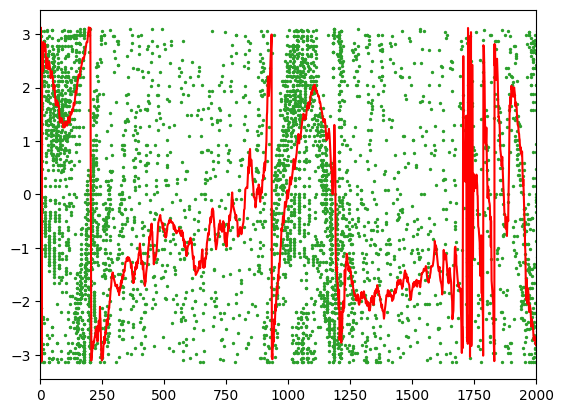

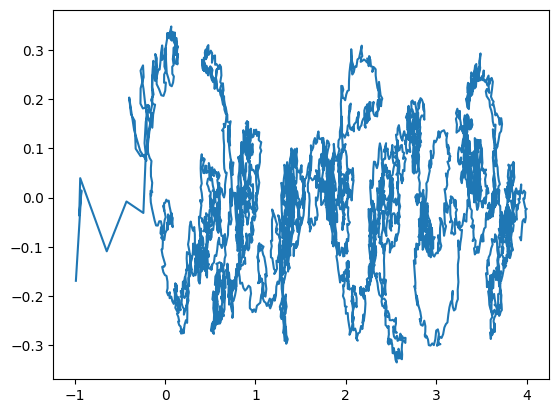

In [91]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.3+0.3j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

plt.figure()
plt.plot(complex_kalman.real+tval_vec/2000, complex_kalman.imag, '-')


12.52251244271976

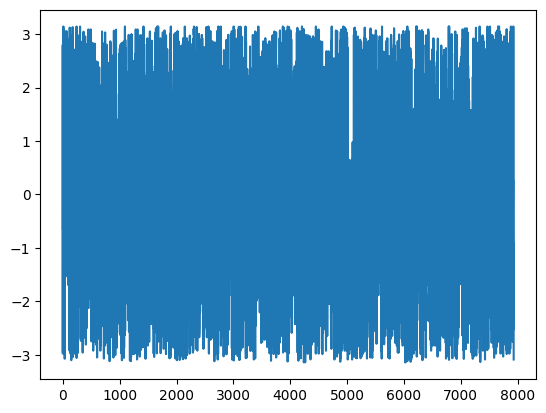

In [92]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()


### Phase Unwrapping and Continuous Phase Analysis


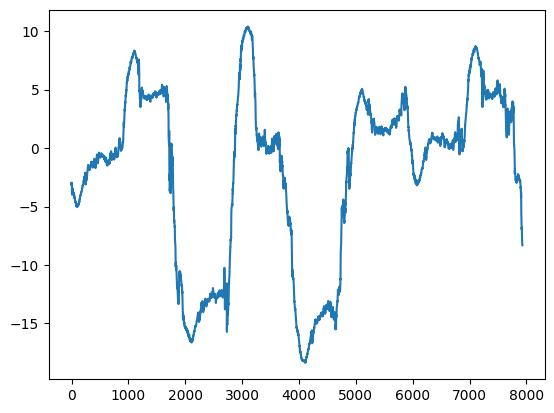

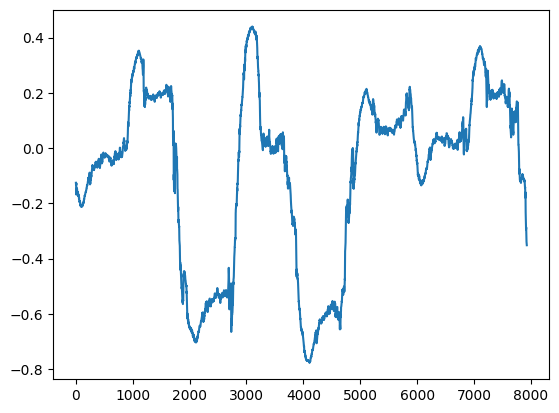

In [93]:
wavelength = 532e-9
centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)
z = centroid_y/(2*np.pi)*wavelength/2

plt.figure()
plt.plot(tval_vec, z/1e-6)


### Displacement calc (nano)

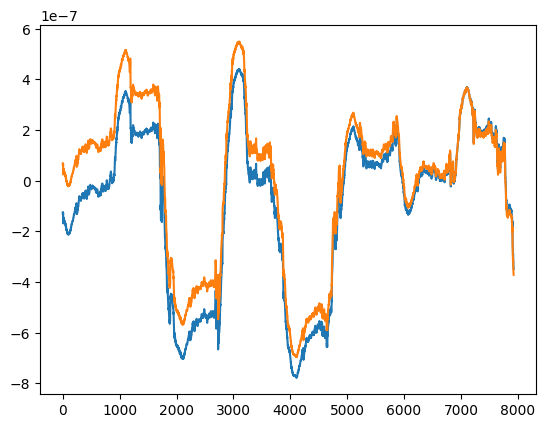

In [94]:
t_step = 1

t_interp = np.arange(tval_vec.min(), tval_vec.max(), t_step)
z_interp = np.interp(t_interp, tval_vec, z)

plt.plot(t_interp, z_interp)

z_detrend = scipy.signal.detrend(z_interp)
plt.plot(t_interp, z_detrend)


### FFT for finding main frequency of the signal

(0.0, 4000.0)

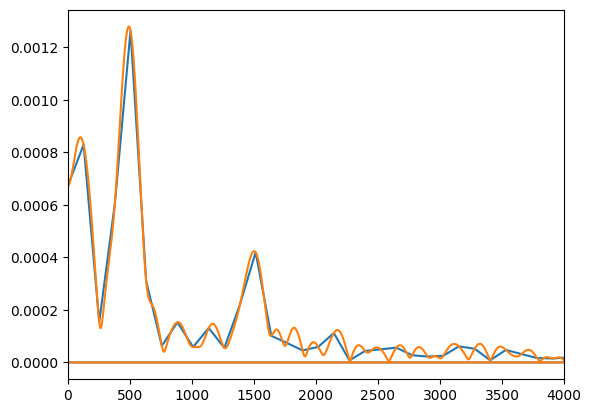

In [95]:
a = np.pad(z_interp, len(z_interp)*2)
a = np.pad(z_interp, 2**20-1)


ft = np.fft.fft(z_interp)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

ft = np.fft.fft(a)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

plt.xlim(0, 4000)

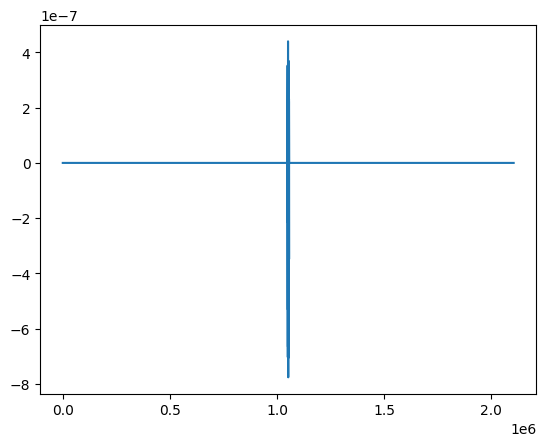

In [96]:
#a = np.pad(z_interp, len(z_interp)*2)

plt.plot(a)